In [1]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import statsmodels.api as sm
import numpy as np 
import pandas as pd
import datetime as dt

C:\Users\Aashay\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ether = pd.read_csv('C:/Users/Aashay/Downloads/ethereumdata.csv')
ether.head()

,timestamp,total_addresses,blocksize,price_USD,hashrate,marketcap_USD,market-cap-value,transactions
0,1438214400,9205,644,0.0,23.7569,0.0,72049306.59,8893
1,1438300800,9361,582,0.0,48.1584,0.0,72085498.31,0
2,1438387200,9476,575,0.0,55.2709,0.0,72113204.25,0
3,1438473600,9563,581,0.0,64.1779,0.0,72141427.69,0
4,1438560000,9639,587,0.0,69.8559,0.0,72169404.41,0


In [3]:

plt.style.use('ggplot')

plt.figure(1)
plt.scatter(ether.price_USD, ether.timestamp)

plt.figure(2)
plt.scatter(ether.blocksize, ether.timestamp)

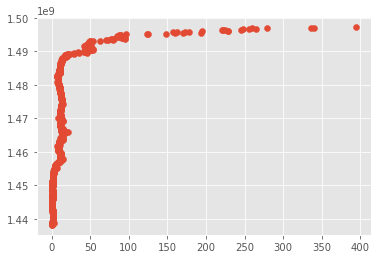

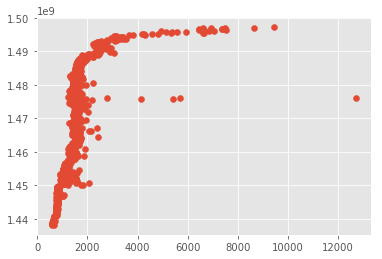

In [4]:
plt.show()

In [5]:
#code provided on kaggle to convert timestamp into date-time
def timeConvert(timestamps):
    timeValue = list(range(len(timestamps)))
    for i in range(len(timestamps)):
        timeValue[i] = (dt.datetime.fromtimestamp(timestamps[i]).strftime('%Y-%m-%d'))
    return timeValue;


ether['date-time'] = pd.DataFrame(timeConvert(ether['timestamp']))

In [6]:
print(ether.head())

    timestamp  total_addresses  blocksize  price_USD  hashrate  marketcap_USD  \
0  1438214400             9205        644        0.0   23.7569            0.0   
1  1438300800             9361        582        0.0   48.1584            0.0   
2  1438387200             9476        575        0.0   55.2709            0.0   
3  1438473600             9563        581        0.0   64.1779            0.0   
4  1438560000             9639        587        0.0   69.8559            0.0   

   market-cap-value  transactions   date-time  
0       72049306.59          8893  2015-07-30  
1       72085498.31             0  2015-07-31  
2       72113204.25             0  2015-08-01  
3       72141427.69             0  2015-08-02  
4       72169404.41             0  2015-08-03  


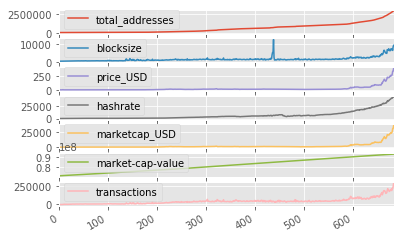

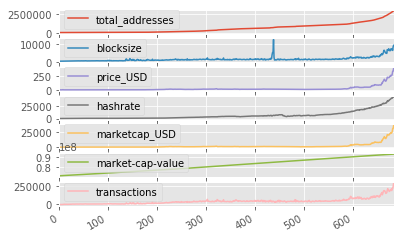

In [13]:
etherprice = ether.drop(['timestamp'],axis=1)
etherprice.head()

etherprice.plot(subplots=True)
plt.show()

Need a better way to visualize. Let's write down a function for it.

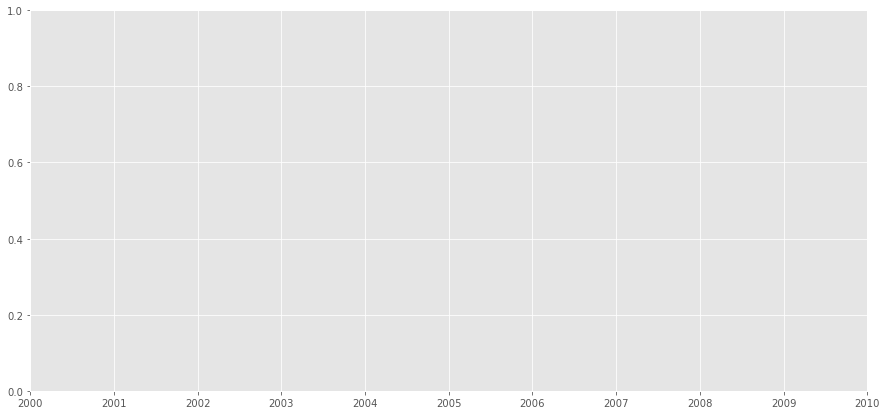

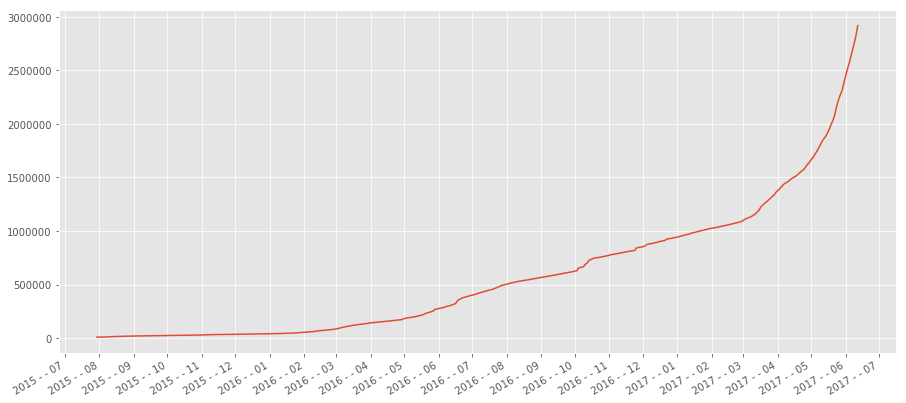

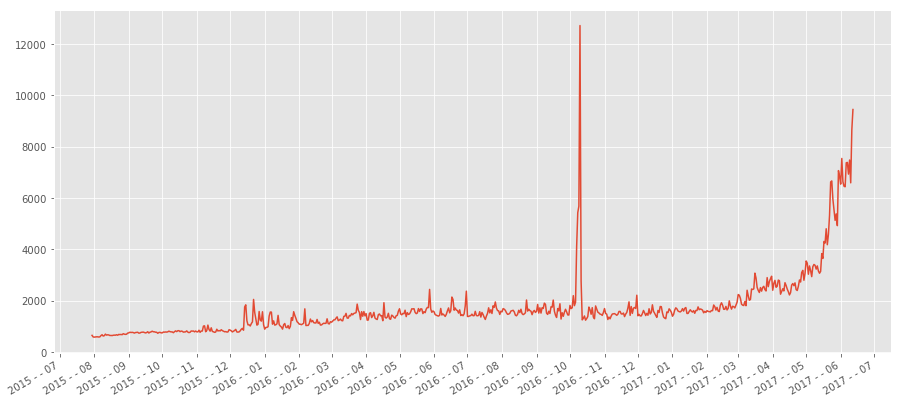

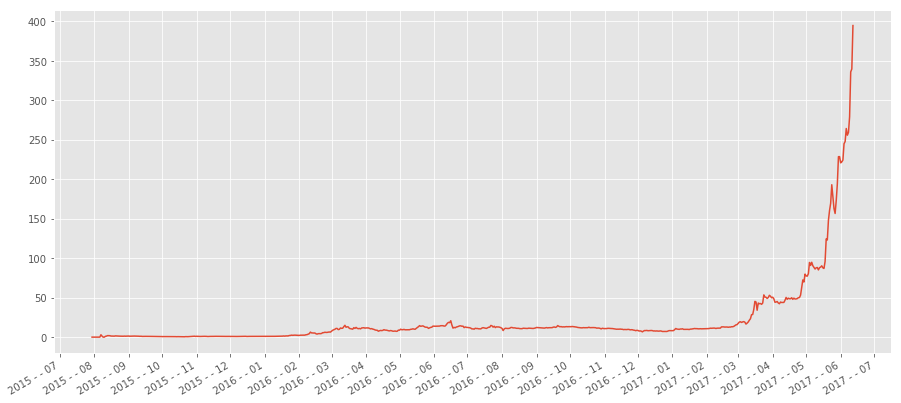

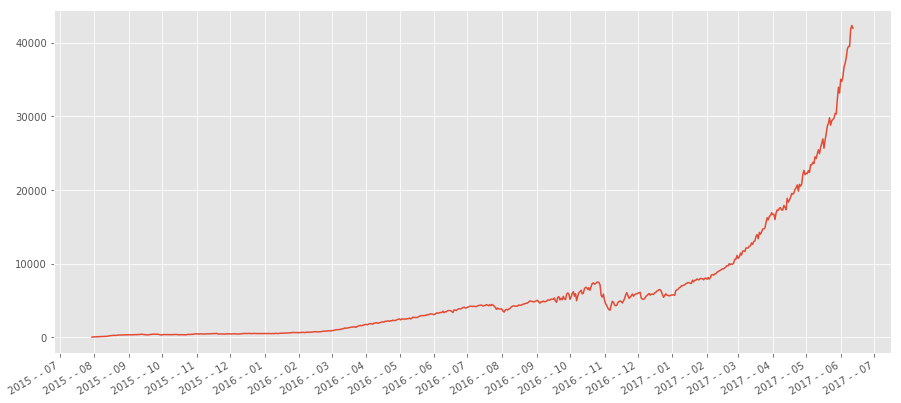

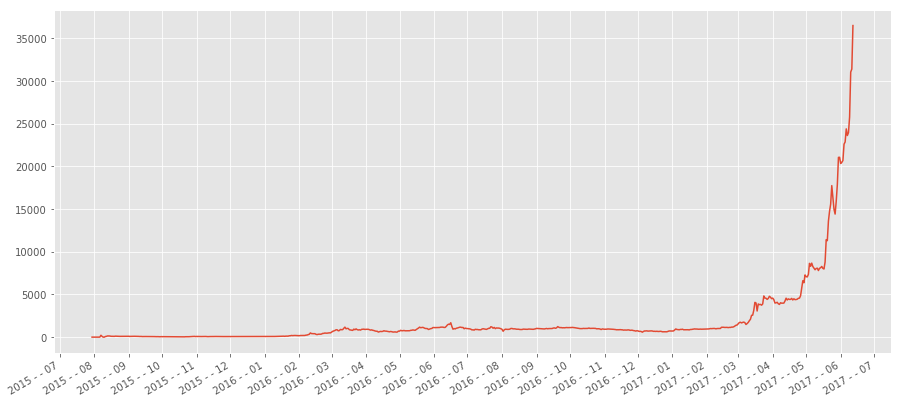

In [27]:
import matplotlib.dates as mdates


def plot(x,y):
    x=x.values
    y = y.values
    plt.style.use('ggplot')
    x = pd.to_datetime(x)
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(x,y)
    #ax.grid(False)
    # matplotlib date format object
    
    hfmt = mdates.DateFormatter('%Y - - %m')
    # format the ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(hfmt)
    ax.format_xdata = hfmt
    fig.autofmt_xdate()
    plt.show()

columns = ['total_addresses','blocksize','price_USD','hashrate','marketcap_USD']
    
    
for i in columns:
    plot(ether['date-time'],ether[i])

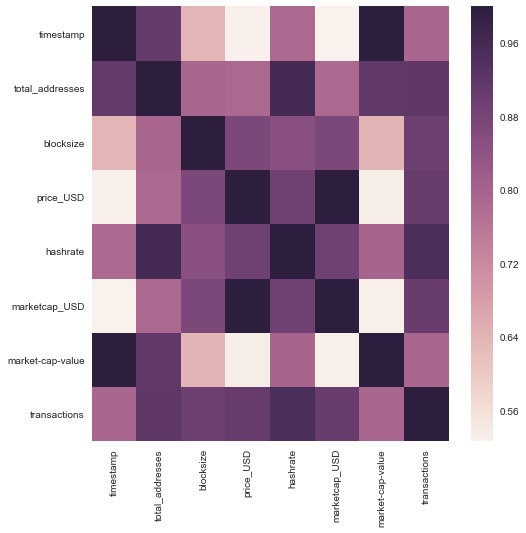

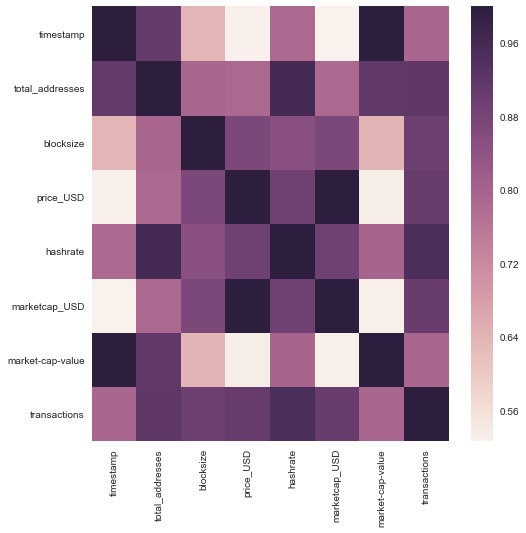

In [38]:
import seaborn as sns

plt.subplots(figsize = (8, 8))
correlation_object = ether.corr()
sns.heatmap(correlation_object)
plt.show()

In [40]:
import datetime as dt
ether['date'] = ether.apply(lambda x: dt.datetime.fromtimestamp(x['timestamp']), axis = 1)
ether['year'] = ether.apply(lambda x: dt.datetime.fromtimestamp(x['timestamp']).year, axis = 1)
print(ether)

      timestamp  total_addresses  blocksize  price_USD    hashrate  \
0    1438214400             9205        644       0.00     23.7569   
1    1438300800             9361        582       0.00     48.1584   
2    1438387200             9476        575       0.00     55.2709   
3    1438473600             9563        581       0.00     64.1779   
4    1438560000             9639        587       0.00     69.8559   
5    1438646400             9696        587       0.00     76.6115   
6    1438732800             9749        579       0.00     81.9449   
7    1438819200             9790        584       0.00     82.9366   
8    1438905600            10314        633       3.00     89.6063   
9    1438992000            10730        668       1.22     97.6083   
10   1439078400            11004        618       0.00    102.5407   
11   1439164800            11679        631       0.00    113.1109   
12   1439251200            13576        692       0.99    126.6631   
13   1439337600     

Let's try an LSTM model on the dataset.

In [45]:
testing_data = ether.loc[ether['year'] == 2017]
training_data = ether.loc[ether['year'] != 2017]


In [34]:
!pip install keras

In [46]:
training_data.head()

,timestamp,total_addresses,blocksize,price_USD,hashrate,marketcap_USD,market-cap-value,transactions,date-time,date,year
0,1438214400,9205,644,0.0,23.7569,0.0,72049306.59,8893,2015-07-30,2015-07-30 05:30:00,2015
1,1438300800,9361,582,0.0,48.1584,0.0,72085498.31,0,2015-07-31,2015-07-31 05:30:00,2015
2,1438387200,9476,575,0.0,55.2709,0.0,72113204.25,0,2015-08-01,2015-08-01 05:30:00,2015
3,1438473600,9563,581,0.0,64.1779,0.0,72141427.69,0,2015-08-02,2015-08-02 05:30:00,2015
4,1438560000,9639,587,0.0,69.8559,0.0,72169404.41,0,2015-08-03,2015-08-03 05:30:00,2015


In [47]:
sns.pairplot(training_data.iloc[:, 1:], hue = "year")

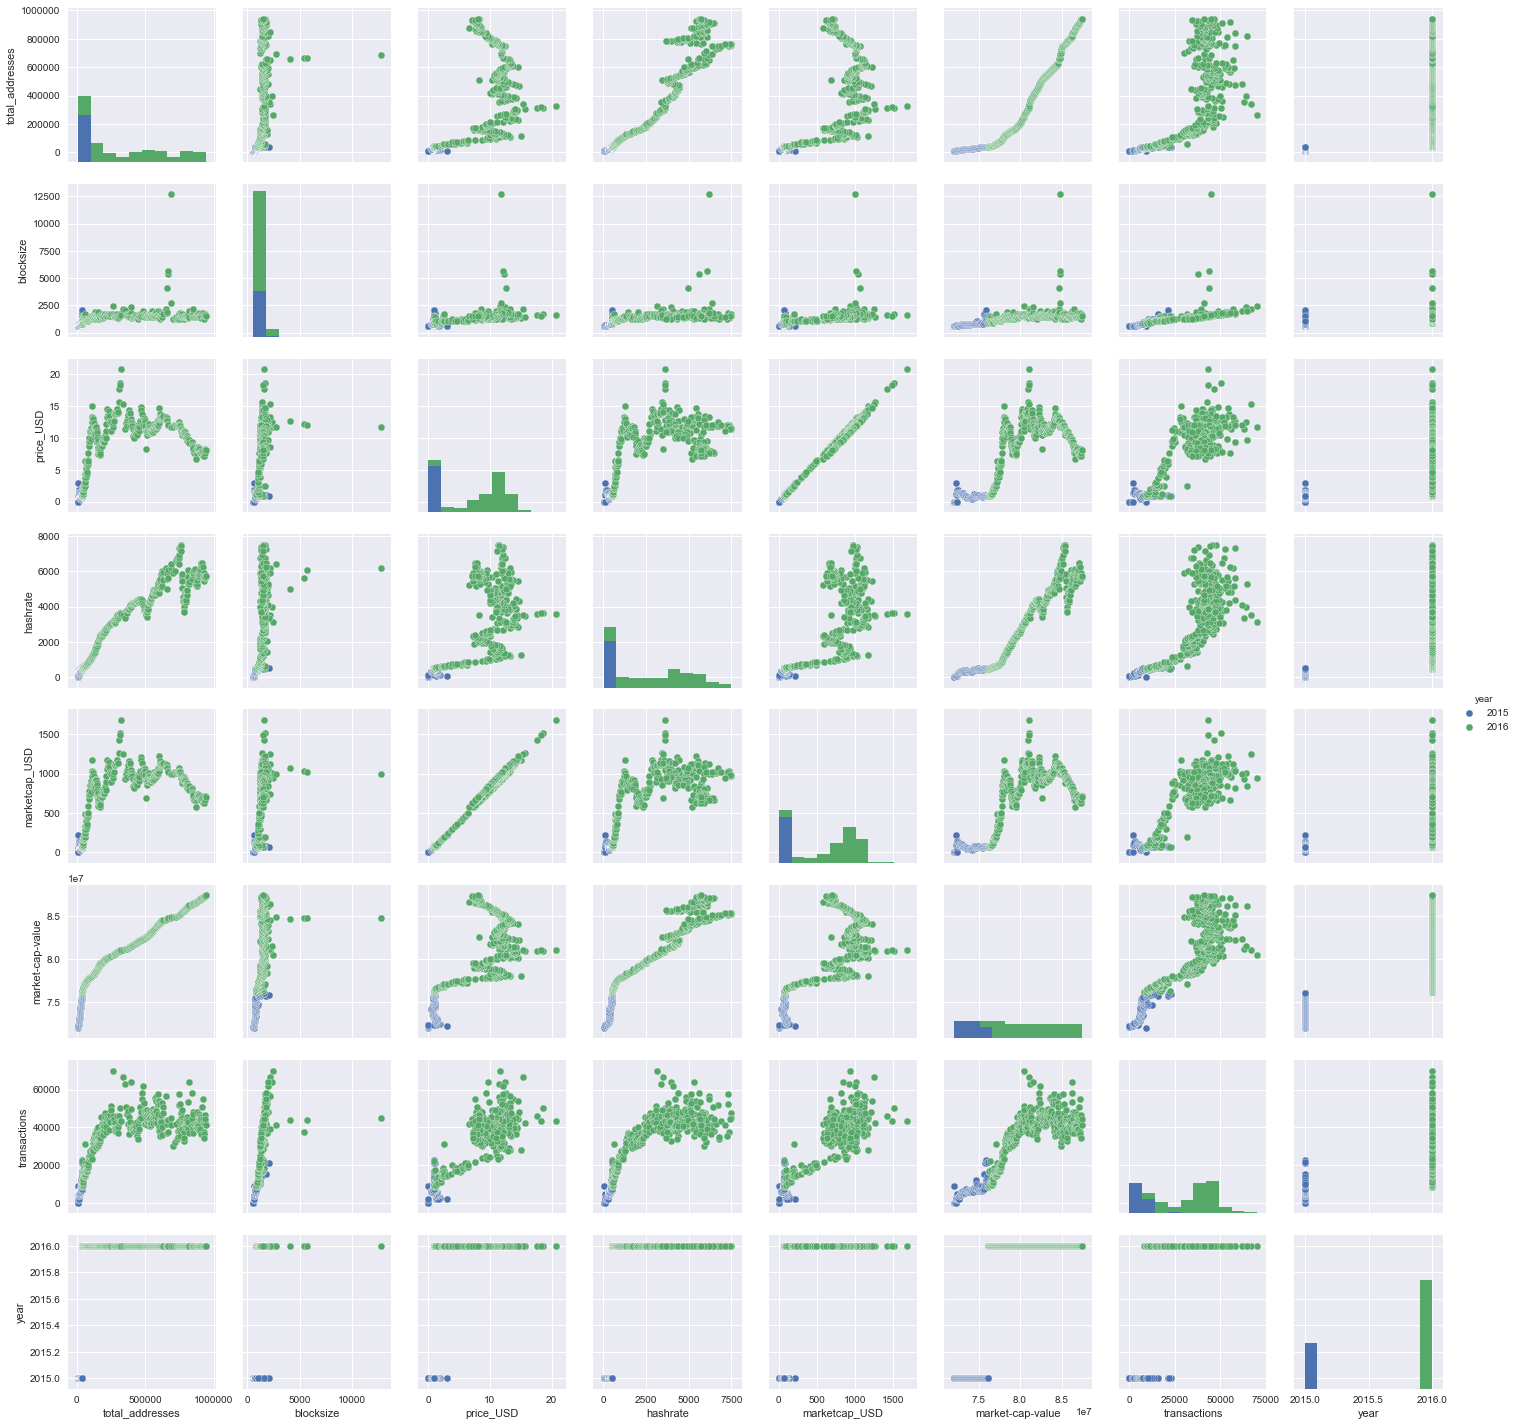

In [48]:
plt.show()

In [86]:
target_X = training_data['price_USD']
target_Y = testing_data['price_USD']
train_index = int(0.9*len(target))

In [87]:
X=training_data.drop(['date-time','date','year','timestamp'],axis=1)
training_data.reset_index(drop=True)
y=testing_data.drop(['date-time','date','year','timestamp'],axis=1)
testing_data.reset_index(drop=True)
print(X.dtypes)
print(y.dtypes)

total_addresses       int64
blocksize             int64
price_USD           float64
hashrate            float64
marketcap_USD       float64
market-cap-value    float64
transactions          int64
dtype: object
total_addresses       int64
blocksize             int64
price_USD           float64
hashrate            float64
marketcap_USD       float64
market-cap-value    float64
transactions          int64
dtype: object


In [88]:
X.price_USD = X.price_USD.astype(int)
X.hashrate = X.hashrate.astype(int)
X.marketcap_USD = X.marketcap_USD.astype(int)

target_X.price_USD = target_X.price_USD.astype(int)
print(X.dtypes)
print(target_X.dtypes)

total_addresses       int64
blocksize             int64
price_USD             int32
hashrate              int32
marketcap_USD         int32
market-cap-value    float64
transactions          int64
dtype: object
float64


In [92]:
target_X = target_X.astype(int)

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0)

rf.fit(X, target_X)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [100]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr


predicted_train = rf.predict(X)
predicted_test = rf.predict(y)
test_score = r2_score(target_Y, predicted_test)
spearman = spearmanr(target_Y, predicted_test)
pearson = pearsonr(target_Y, predicted_test)

print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: -0.338
Test data Spearman correlation: 0.857
Test data Pearson correlation: 0.506


In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = target_Y, y_pred = predicted_test)

7744.1294503067493

As expected, the results were poor, since ethereum prices started shooting up in 2017. If you want better predictions, you can use 2017 as training and only a small part of 2017 as test. 